# Exploratory Data Analysis : Haberman's Survival

#### Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer. It is collected from the study of University of Chicago's Billings Hospital between year 1958 to 1970.

#### More info about the Dataset :-

   - It has four features including class label.
   * Column of age have different age group people.
   * Year columns tells in which year operation had done.
   * Auxillary lymph nodes tells no. of nodes vary from women to women.
   * Survival status 1 shows no. of person survived 5 years or more & survival status 2 shows no. of person died within 5 years.

#### Objective :
#####  To predict a patient survival who had go through surgery for breast cancer.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Imported all the useful libraries.

#Load haberman(1).csv into a pandas dataFrame.
hab = pd.read_csv(r'C:\Users\NADEEM\Music\Applied course\haberman (1).csv')

In [4]:
# Shape tells the no. of rows and columns in the table.
print (hab.shape)

(306, 4)


In [6]:
# It tells the column names.
print(hab.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [9]:
hab["status"].value_counts()

# This dataset is imbalanced because data points of both classes are different.

1    225
2     81
Name: status, dtype: int64

## BIVARIATE ANALYSIS

    Bivariate analysis is form of quantitative analysis which done by the involvment of two variable & shows experimental relation between two variables.

### Scatter Plot

    It gives linear correlation between the numerical varibles in the visual representaion.

In [1]:
# 1-D scatter plot

import numpy as np
hab_1 = hab.loc[hab["status"] == 1];
hab_2 = hab.loc[hab["status"] == 2];

#print(hab_1["age"])

plt.rcParams.update({'font.size': 15}) #setting font size
label = ['status-1', 'status-2']
plt.plot(hab_1["age"], np.zeros_like(hab_1['age']), 'o')
plt.plot(hab_2["age"], np.zeros_like(hab_2['age']), 'o')
plt.title("1-D Scatter Plot Of Age")
plt.xlabel("age" )
plt.ylabel("density")
plt.legend(label)
plt.show()

NameError: name 'hab' is not defined

#### Observation:

    1-D scatter plot shows that many people age from 40 to 70 died. 

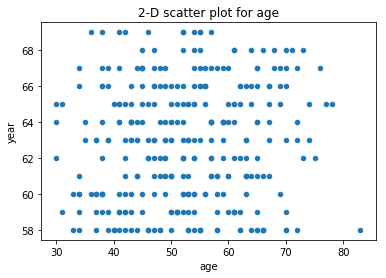

In [12]:

hab.plot(kind='scatter', x='age', y='year') ;
plt.title("2-D scatter plot for age")

plt.show()

#cannot make much sense out it. 


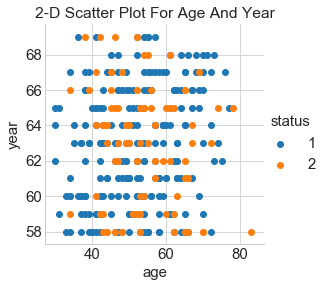

In [55]:
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.rcParams.update({'font.size': 13})
plt.title('2-D Scatter Plot For Age And Year')
plt.show();


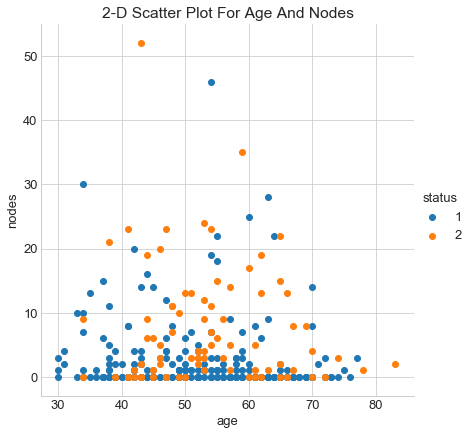

In [56]:
'''
pairwise scatter plot: Pair-Plot
Dis-advantages: 
Can be used when number of features are high.
Cannot visualize higher dimensional patterns in 3-D and 4-D. 
Only possible to view 2D patterns.
'''
sns.set_style("whitegrid");
sns.FacetGrid(hab, hue="status", size=6) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title('2-D Scatter Plot For Age And Nodes')
plt.show();


#### Observation :

* In 2-D scatter plot, Variables like age, nodes, year are not seperable linearly.
* Lymph nodes from 0 to 5 are likely to survived than died.
 

## PAIR PLOT

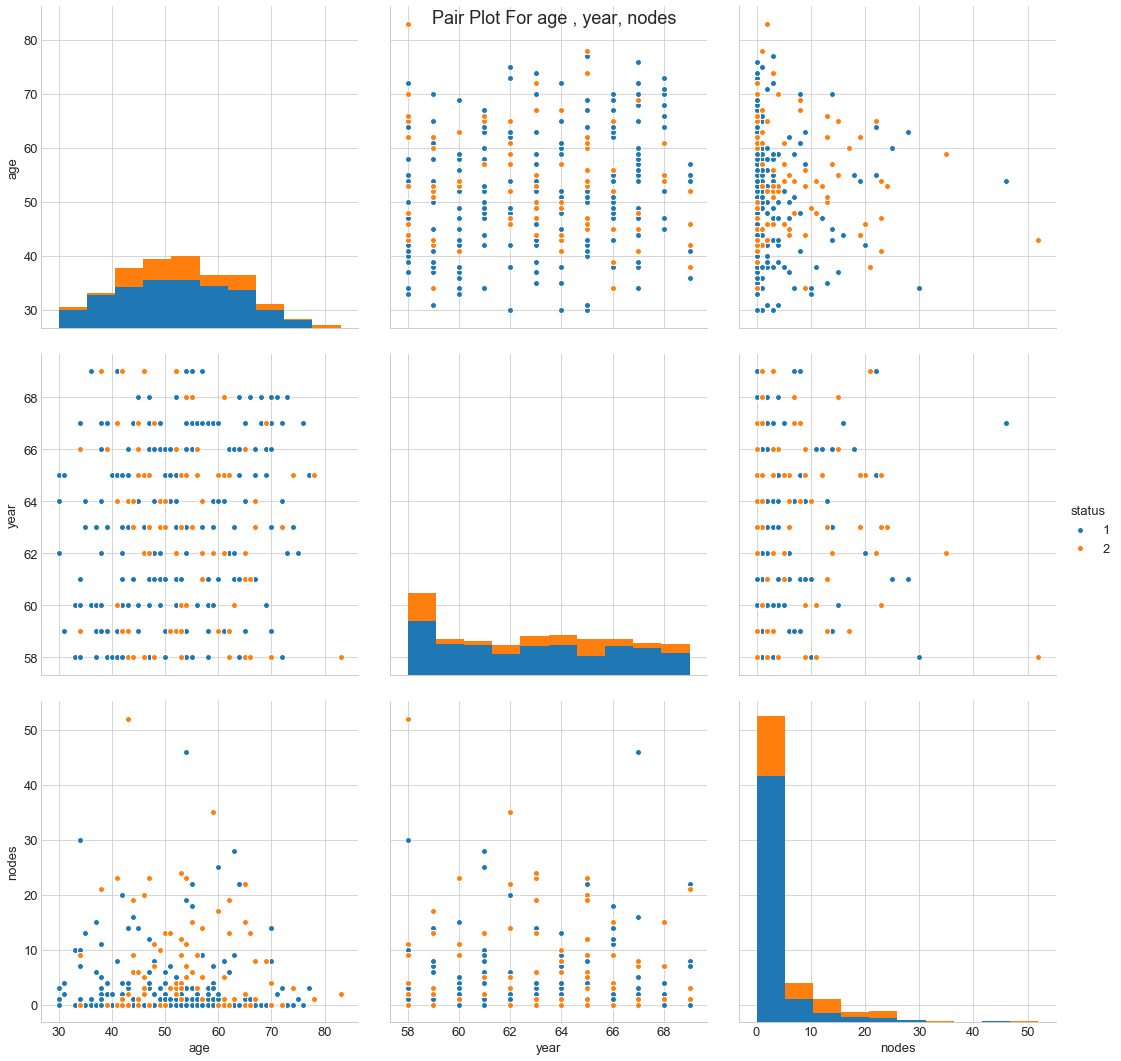

In [57]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.



plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab, hue="status", x_vars=['age','year','nodes'],y_vars=['age','year','nodes'],size=5);
plt.rcParams.update({'font.size': 15})
plt.suptitle('Pair Plot For age , year, nodes')
plt.show()

#### **Observation**

    Lymph Nodes is better than other parameter for the prediction. 
    Pair plot is not much informative here because of immense overlapping.
 

## PDF(Probability Density Function)

C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


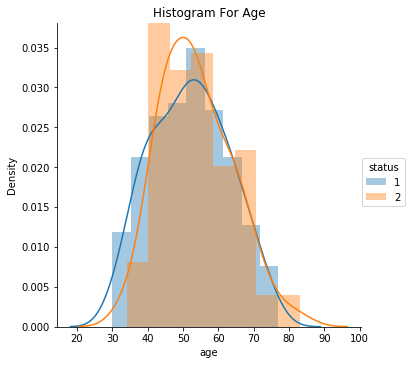

In [4]:
sns.FacetGrid(hab, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram For Age")
plt.ylabel("Density")
plt.show();


#### Observation :

* Highly overlapped, So chances of survival is independent of age.
* Age group from 30-40 have survival chances, 40-60 have less survival chances but 60-75 have equal survival chance.

C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


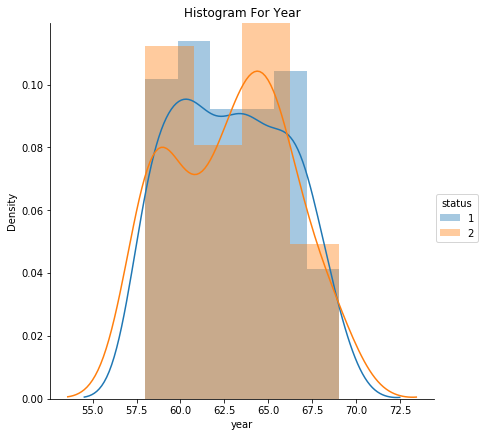

In [5]:
sns.FacetGrid(hab, hue="status", size=6) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram For Year")
plt.ylabel("Density")
plt.show();


#### Observation:

    In 1965, there was more unsuccessful operations.

C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\NADEEM\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


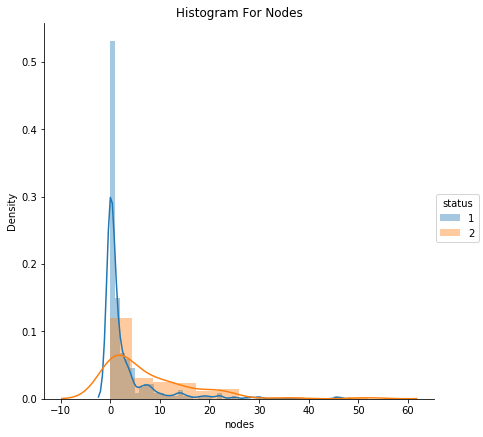

In [6]:
sns.FacetGrid(hab, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram For Nodes")
plt.ylabel("Density")
plt.show();


#### Observation

    Most probabily 55% people survived having lymph node 0 to 5 but 12% also died.
    As lymph nodes are increased, survival chances decreased.

## CDF(Cummulative Distributed Function)

In [7]:
bin_edges[1:].shape,pdf.shape

((20,), (20,))

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


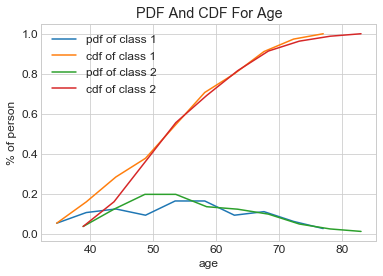

In [64]:

counts, bin_edges = np.histogram(hab_1['age'], bins=10, 
                                 density = True)

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.title("PDF And CDF For Age")
plt.xlabel("age")
plt.ylabel("% of person")


counts, bin_edges = np.histogram(hab_2["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.rcParams.update({'font.size': 12})
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.show();


#### Observation :

* persons have age 38 or less has survival percent 18% .
* 75 years age or more people have death percent about 99% . 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


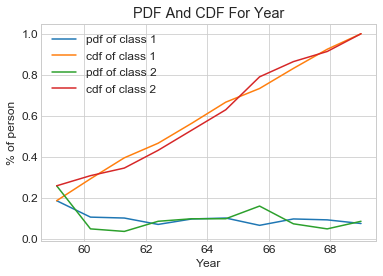

In [63]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]

counts, bin_edges = np.histogram(hab_1['year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(hab_2['year'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.rcParams.update({'font.size': 12})
plt.legend(label)
plt.title("PDF And CDF For Year")
plt.xlabel("Year")
plt.ylabel("% of person")
plt.show();


#### Observation :

* Both the graph line are coinciding. Hence, not useful.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


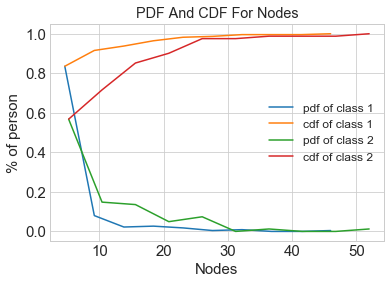

In [62]:
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]

counts, bin_edges = np.histogram(hab_1['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(hab_2['nodes'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)
plt.rcParams.update({'font.size': 12})
plt.legend(label)
plt.title("PDF And CDF For Nodes")
plt.xlabel("Nodes")
plt.ylabel("% of person")
plt.show();


#### Observations:

* Approximately 99 % of persons having lymph nodes more than 46 has not survived.


In [19]:

#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(hab_1["age"]))
#Mean with an outlier.
print(np.mean(np.append(hab_1["age"],50)));
print(np.mean(hab_2["year"]))


print("\nStd-dev:");
print(np.std(hab_1["age"]))
print(np.std(hab_2["year"]))



Means:
52.01777777777778
52.008849557522126
62.82716049382716

Std-dev:
10.98765547510051
3.3214236255207883


## MEAN , MEDIAN , PERCENTILES & QUANTILES

In [20]:
''' 
MEDIAN TELLS THE MIDDLE MOST TERM ^^^ MEDEIAN DOESNOT CHANGES DRASTICALLY IF BY MISTAKEN ONE GREATER VALUE IS TAKEN ^^^ BUT IF 50% OF VALUE 
IS WRITTEN WRONG THEN VALUE IS CHANGES DRASTICALLY '''

'''
50TH PERCENTILE IS MEDIAN ^^^ 25TH, 50TH, 75TH PERCENTILES ARE QUANTILES ^^^ 90TH AND 95TH PERCENTILES IS MORE IMPORTANT IN ANY DATA JUST 
LIKE DELIVERY IN AMAZON OR IIT JEE EXAMS ^^^ 95TH PERCENTILE MEANS YOU ARE AHEAD OF 95% PERCENT PEOLE OUT OF 100%'''

'''
go to the formuula of IQR , MAD ^^^ IQR IS THE RANGE OF 75TH PERCENTILE - 25TH PERCENTILE'''
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(hab_1["age"]))
#Median with an outlier
print(np.median(np.append(hab_1["age"],50)));
print(np.median(hab_2["age"]))

print("\nQuantiles:")
print(np.percentile(hab_1["age"],np.arange(0, 100, 25)))
print(np.percentile(hab_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(hab_1["age"],90))
print(np.percentile(hab_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hab_1["age"]))
print(robust.mad(hab_2["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


## Box Plot Whiskers

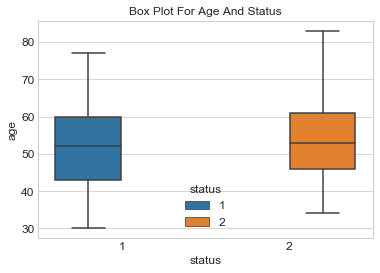

In [66]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below do not correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='age', hue= 'status', data=hab)
plt.rcParams.update({'font.size': 10})
plt.title('Box Plot For Age And Status')
plt.show()

#### Observation:

Almost 95% of points are overlapping with each other and have almost same median.
So, Age parameter is not much useful.

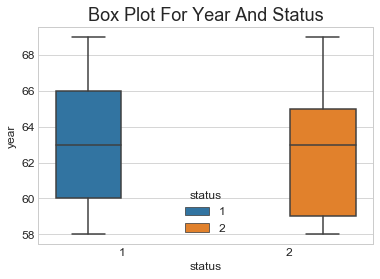

In [69]:
sns.boxplot(x='status',y='year', hue ='status', data=hab)
plt.rcParams.update({'font.size': 15})
plt.title('Box Plot For Year And Status')
plt.show()

#### Observation:

Almost 85% of data points are overlapping with eah oher and have almost same median. So, Year parameter is not much useful.

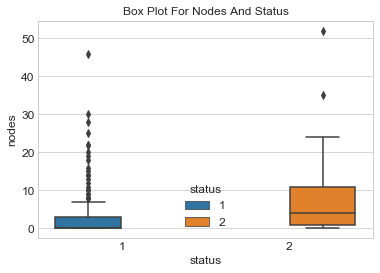

In [72]:
sns.boxplot(x='status',y='nodes', hue ='status', data=hab)
plt.rcParams.update({'font.size': 10})
plt.title('Box Plot For Nodes And Status')
plt.show()

#### Observation:

Outliers are shown in Box Plot of status 1 and 50% of patients have lymph nodes less than or equal to 3. 

## Violin Plot

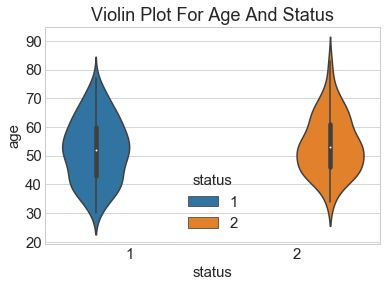

In [86]:
# A violin plot combines the benefits of the previous two plots pdf and histogram
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="age", hue= "status", data=hab, size=8)
plt.title('Violin Plot For Age And Status')
plt.rcParams.update({'font.size': 10})
plt.show()

#### Observation:

* Many people of age between 45-65 did not survive. 
* Almost 95% of points are overlapping with each other and have almost same median.
  So, Age parameter is not much useful.

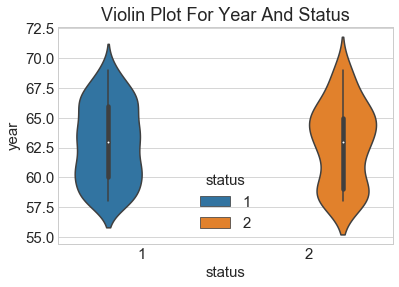

In [81]:
sns.violinplot(x="status", y="year", hue="status", data=hab, size=8)
plt.title('Violin Plot For Year And Status')
plt.rcParams.update({'font.size': 10})
plt.show()

#### Observation :

* Many people had survived in year 1959 to 1962 due to successful operation.
* In year 1962 few people died as compared to other but In 1965, more people died due to unsuccessful operation.

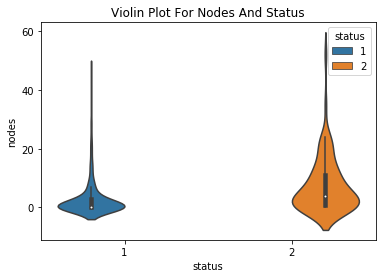

In [3]:
sns.violinplot(x="status", y="nodes",hue="status", data=hab, size=8)
plt.title('Violin Plot For Nodes And Status')
plt.rcParams.update({'font.size': 15})
plt.show()

#### Observation :

* Patients with more nodes are less likely to survive.
* Patients having zero nodes did surive but some also died. So lymph nodes are not accurate for survival.

## Overall Conclusion:


#### From Scatter And Pair - Plots ---

1. From Scatter Plot, Approximately 99% women have survived having lymph node = 0 and age group of 51 to 59.  
2. Pair PLot is not much useful but Lymph nodes is better option than the rest.

#### From PDF's and CDF's ---

1. Age of 30-32 have survived.
2. Year is not good choice to analyze this data.
3. When disease was detected with less lymphs nodes (0 to 4), person was survived mosstly. But this didn't mean having more        lymph nodes (greater than 5) caused death to patient. 

#### Other Points ---
1. This dataset is imbalanced as it does not contain equal data points for each class.
2. Graph in this dataset is not linearly seperable for each class And It also shows immense overlapping thatswhy very difficult    to predict the class.
3. lymph nodes is more useful feature than opeartion year & age for classification.
4. But need more useful feature to analyze the data because operation year, age & lymph nodes are not so much useful. 
5. We can't build simple model by using if else condition.
6. We need of more advanced technique to analyze this dataset.
